In [603]:
import pandas as pd

# Cleaning dataset

In [604]:
df = pd.read_csv('comprehensive_statscan_diabetes.csv')
df.head()

/var/folders/kh/pt2vf28n4791jxfqb7gwhd7r0000gn/T/ipykernel_20062/845858075.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('comprehensive_statscan_diabetes.csv')


,REF_DATE,GEO,DGUID,Age group,Sex,Indicators,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2015,Canada (excluding territories),NaN,"Total, 12 years and over",Both sexes,"Perceived health, very good or excellent",Number of persons,Number,223,units,0,v110787543,1.1.1.1.1,18759800.0,NaN,NaN,NaN,0
1,2015,Canada (excluding territories),NaN,"Total, 12 years and over",Both sexes,"Perceived health, very good or excellent","Low 95% confidence interval, number of persons",Number,223,units,0,v110787544,1.1.1.1.2,18556100.0,NaN,NaN,NaN,0
2,2015,Canada (excluding territories),NaN,"Total, 12 years and over",Both sexes,"Perceived health, very good or excellent","High 95% confidence interval, number of persons",Number,223,units,0,v110787545,1.1.1.1.3,18963600.0,NaN,NaN,NaN,0
3,2015,Canada (excluding territories),NaN,"Total, 12 years and over",Both sexes,"Perceived health, very good or excellent",Percent,Percent,239,units,0,v110787546,1.1.1.1.4,61.9,NaN,NaN,NaN,1
4,2015,Canada (excluding territories),NaN,"Total, 12 years and over",Both sexes,"Perceived health, very good or excellent","Low 95% confidence interval, percent",Percent,239,units,0,v110787547,1.1.1.1.5,61.3,NaN,NaN,NaN,1


In [605]:
columns_to_keep = ["REF_DATE", "GEO", "Age group", "Sex", "Indicators", "Characteristics", "VALUE"]

for column in df.columns:
    if column not in columns_to_keep:
        df = df.drop(column, axis=1)

df = df.rename(columns={"REF_DATE": "Year", "GEO": "Region", "Age group": "Age", "Indicators": "Indicator", "Characteristics": "Characteristic", "VALUE": "Value"})
df = df[df['Characteristic'] == 'Percent']
df = df.drop('Characteristic', axis=1)
df = df.dropna()
df.head()

,Year,Region,Age,Sex,Indicator,Value
3,2015,Canada (excluding territories),"Total, 12 years and over",Both sexes,"Perceived health, very good or excellent",61.9
9,2015,Canada (excluding territories),"Total, 12 years and over",Both sexes,"Perceived health, fair or poor",10.7
15,2015,Canada (excluding territories),"Total, 12 years and over",Both sexes,"Perceived mental health, very good or excellent",72.4
21,2015,Canada (excluding territories),"Total, 12 years and over",Both sexes,"Perceived mental health, fair or poor",5.9
27,2015,Canada (excluding territories),"Total, 12 years and over",Both sexes,"Perceived life stress, most days quite a bit o...",21.4


In [606]:
num_rows = df.shape[0]
num_columns = df.shape[1]
total_elements = df.size

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"Total elements in the DataFrame: {total_elements}")

assert total_elements == (num_rows * num_columns), "The calculated size doesn't match the DataFrame's size attribute."

Number of rows: 33054
Number of columns: 6
Total elements in the DataFrame: 198324


# One hot encode features

In [607]:
df = pd.get_dummies(df, columns=["Region"], drop_first=False)
df = pd.get_dummies(df, columns=["Age"], drop_first=False)
df = pd.get_dummies(df, columns=["Sex"], drop_first=False)
df = pd.get_dummies(df, columns=["Indicator"], drop_first=False)

# Preparing data

In [608]:
from sklearn.model_selection import train_test_split

In [609]:
X = df.drop(["Value"], axis=1)
y = df["Value"].astype(float)

In [610]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [611]:
from sklearn.preprocessing import StandardScaler

In [612]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

# Building the model

In [613]:
import tensorflow as tf

In [614]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [615]:
model.compile(optimizer='adam', loss='mse')

# Training the model

In [616]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
744/744 [==============================] - 2s 2ms/step - loss: 231.1459 - val_loss: 36.1687
Epoch 2/50
744/744 [==============================] - 2s 2ms/step - loss: 22.3112 - val_loss: 17.4072
Epoch 3/50
744/744 [==============================] - 1s 2ms/step - loss: 15.1449 - val_loss: 14.6697
Epoch 4/50
744/744 [==============================] - 1s 2ms/step - loss: 13.5633 - val_loss: 13.8941
Epoch 5/50
744/744 [==============================] - 1s 2ms/step - loss: 12.6893 - val_loss: 13.5744
Epoch 6/50
744/744 [==============================] - 1s 2ms/step - loss: 12.1779 - val_loss: 13.6973
Epoch 7/50
744/744 [==============================] - 1s 2ms/step - loss: 11.7427 - val_loss: 12.4466
Epoch 8/50
744/744 [==============================] - 1s 2ms/step - loss: 11.3009 - val_loss: 11.9780
Epoch 9/50
744/744 [==============================] - 1s 2ms/step - loss: 11.0632 - val_loss: 12.2823
Epoch 10/50
744/744 [==============================] - 1s 2ms/step - loss: 10.866

In [617]:
loss = model.evaluate(X_test_scaled, y_test)

207/207 [==============================] - 0s 1ms/step - loss: 11.3645


# Model predictions and visualization

In [618]:
import matplotlib.pyplot as plt

In [619]:
y_pred = model.predict(X_test_scaled)

207/207 [==============================] - 0s 1ms/step


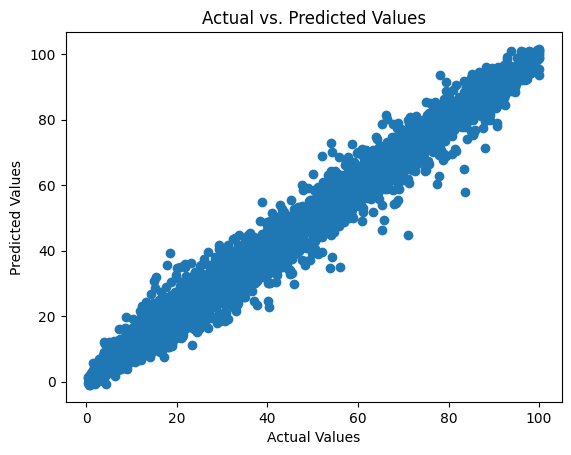

In [620]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [621]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


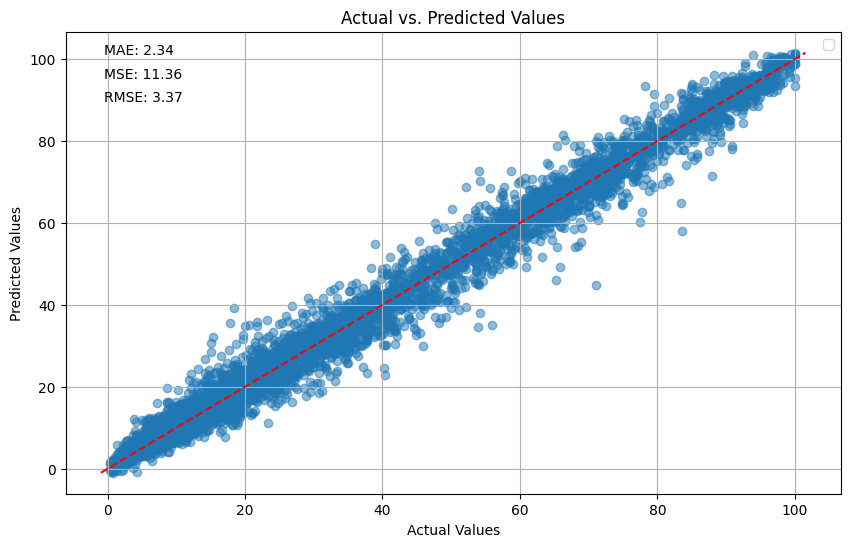

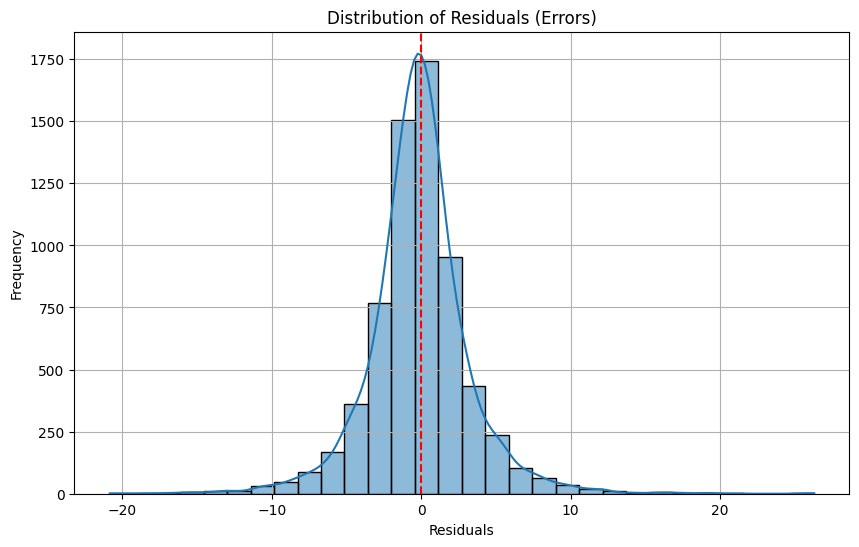

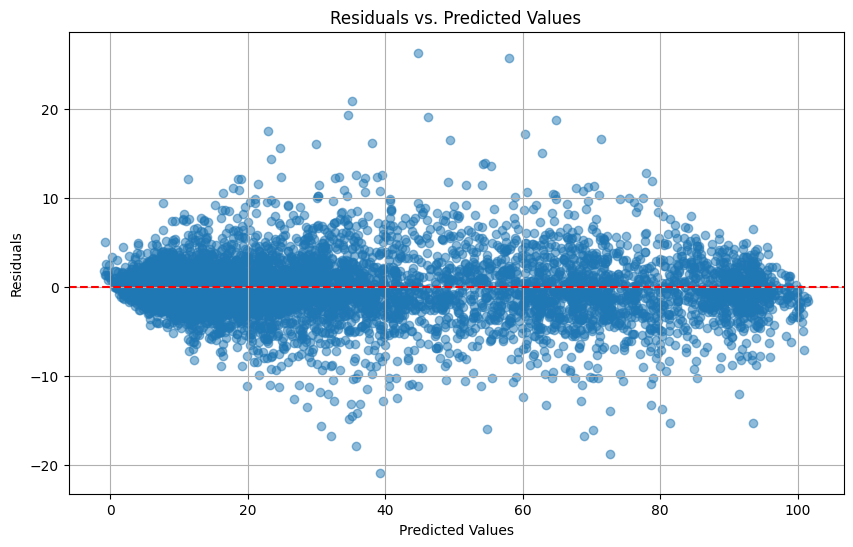

In [622]:
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# plotting the perfect prediction line
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# annotating the error metrics
plt.annotate(f'MAE: {mae:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.annotate(f'MSE: {mse:.2f}', xy=(0.05, 0.90), xycoords='axes fraction')
plt.annotate(f'RMSE: {rmse:.2f}', xy=(0.05, 0.85), xycoords='axes fraction')

plt.legend()
plt.grid(True)
plt.show()

# calculating residuals
residuals = y_test - y_pred.flatten()

# plotting the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Errors)')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

# plotting residuals against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()
